In [1]:
import scanpy as sc
import warnings
# To ignore Pandas Future Warning
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import phenograph
import copy
from scipy import sparse
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
#%matplotlib inline

import anndata as ad 

In [2]:
adata = ad.read_h5ad("filter.h5ad")


In [5]:
adata

AnnData object with n_obs × n_vars = 360673 × 33
    obs: 'sample', 'roi', 'obj_id', 'X_centroid', 'Y_centroid', 'area', 'perimeter', 'minor_axis_length', 'major_axis_length', 'eccentricity', 'solidity', 'n_protein_by_counts', 'total_counts', 'cell_count', 'mob_id', 'pre_post', 'mob', 'cell_id', 'leiden'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'markers', 'channel', 'total_signal', 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'moved_genes', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'log', 'raw', 'z_scale'
    obsp: 'connectivities', 'distances'

In [169]:
lineage = ['CD14(Nd143)', 'CD16(Sm147)', 'panCytokeratin(Nd148)', 'XCR1(Sm149)',
       'FOXP3(Gd155)', 'CD4(Gd156)', 'CD68(Tb159)', 'NKp46(Dy161)',
       'CD8a(Dy162)', 'CD3(Yb170)', 'CD66b(Yb174)','GATA3(Yb171)', 'EpCAM(Nd144)' ]

/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


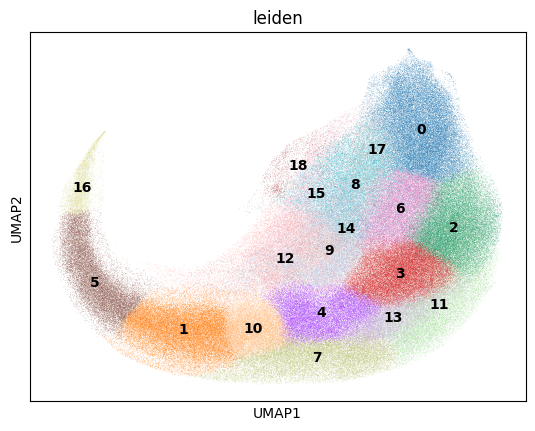

In [168]:
sc.pl.umap(adata, color=['leiden'],legend_loc='on data')

/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


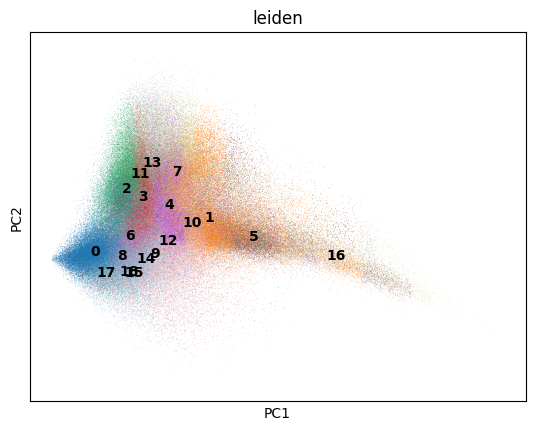

In [6]:
sc.pl.pca(adata, color=['leiden'],legend_loc='on data')

In [171]:
adata.obs['cluster_1'] = adata.obs['leiden']
new_cluster_names = [
    '56_1', 'Undefined_1', 'Tumor_1', 'Tumor_2',
    'Gata_1', 'Undefined_2', '56_2', 'Tumor_3',
    'Macrophage_1', 'CD4_Tcell_1', 'Undefined_3', 'Tumor_4',
    'Macrophage_2', 'Tumor_5', 'NK', 'CD8_Tcell',
    'Undefined_4', 'CD4_Tcell_2', 'Neutrophil'] 
adata.rename_categories('cluster_1', new_cluster_names)

In [173]:
adata_lineage = adata[:,adata.var_names.isin(lineage)]
adata_lineage.shape

(360673, 13)

In [174]:
#adata_lineage.obs

/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_

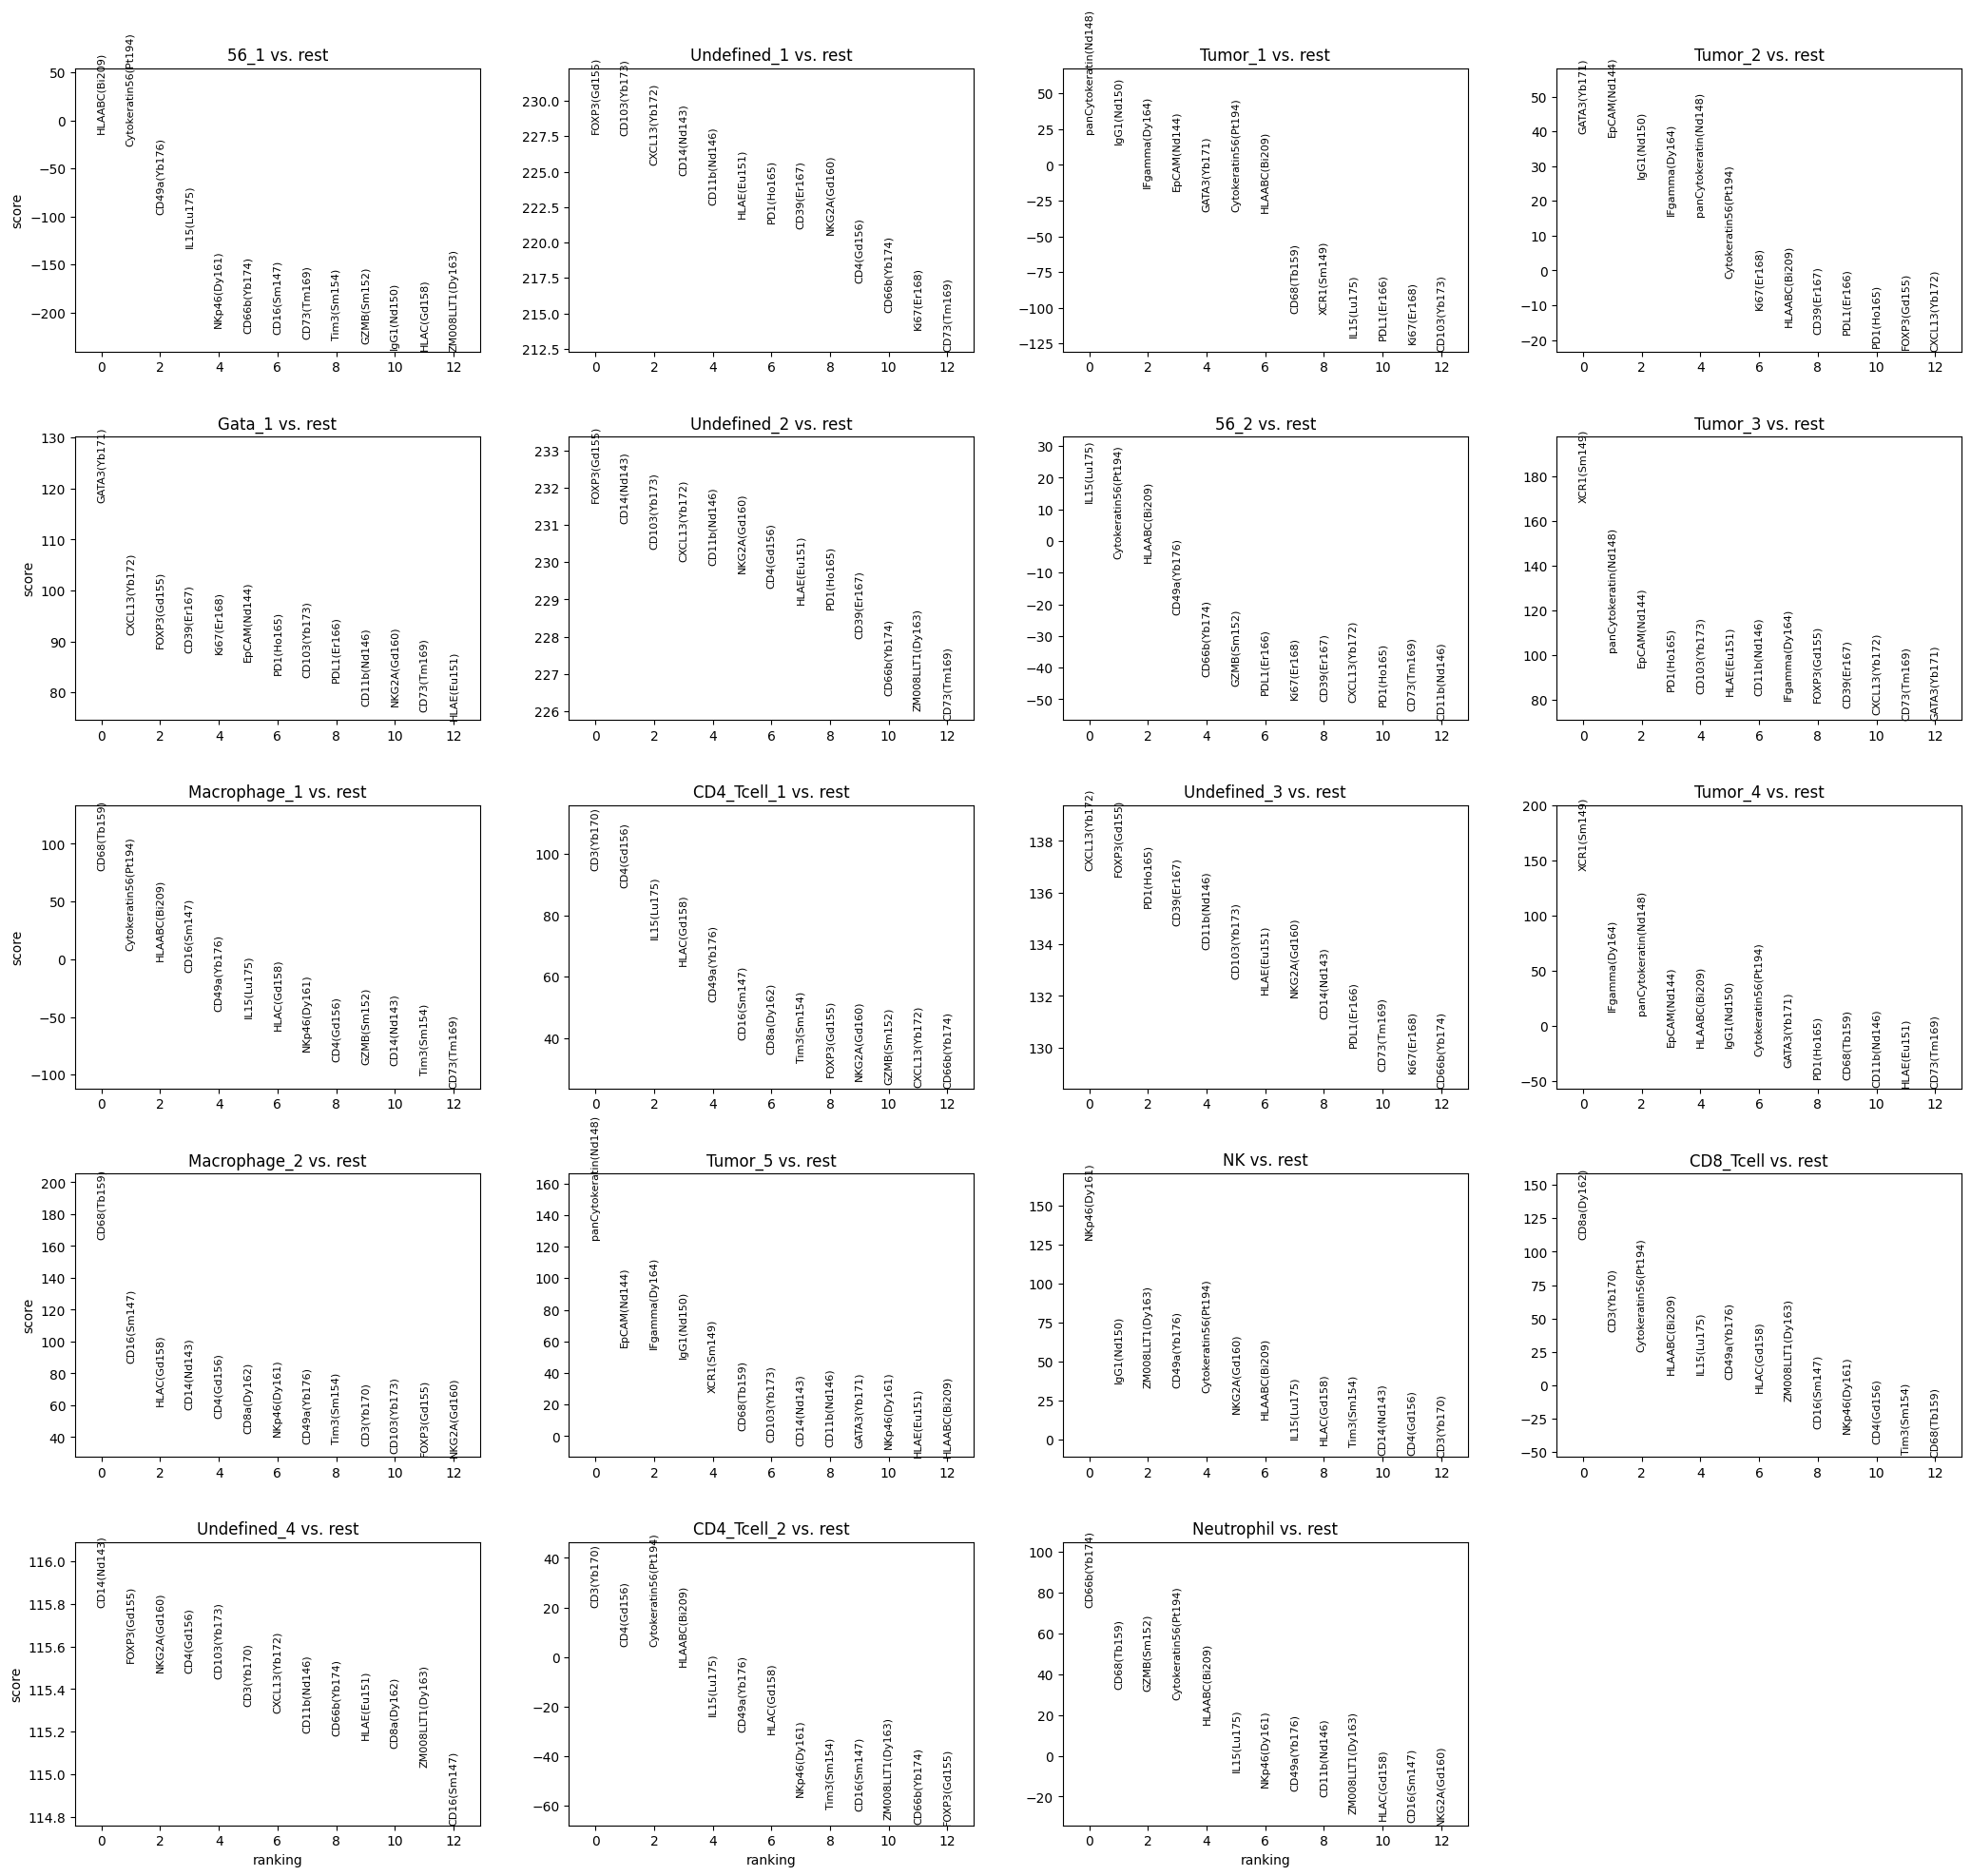

In [175]:
sc.tl.rank_genes_groups(adata, 'cluster_1', method='wilcoxon') 
sc.pl.rank_genes_groups(adata, n_genes=13, sharey=False)

/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered i

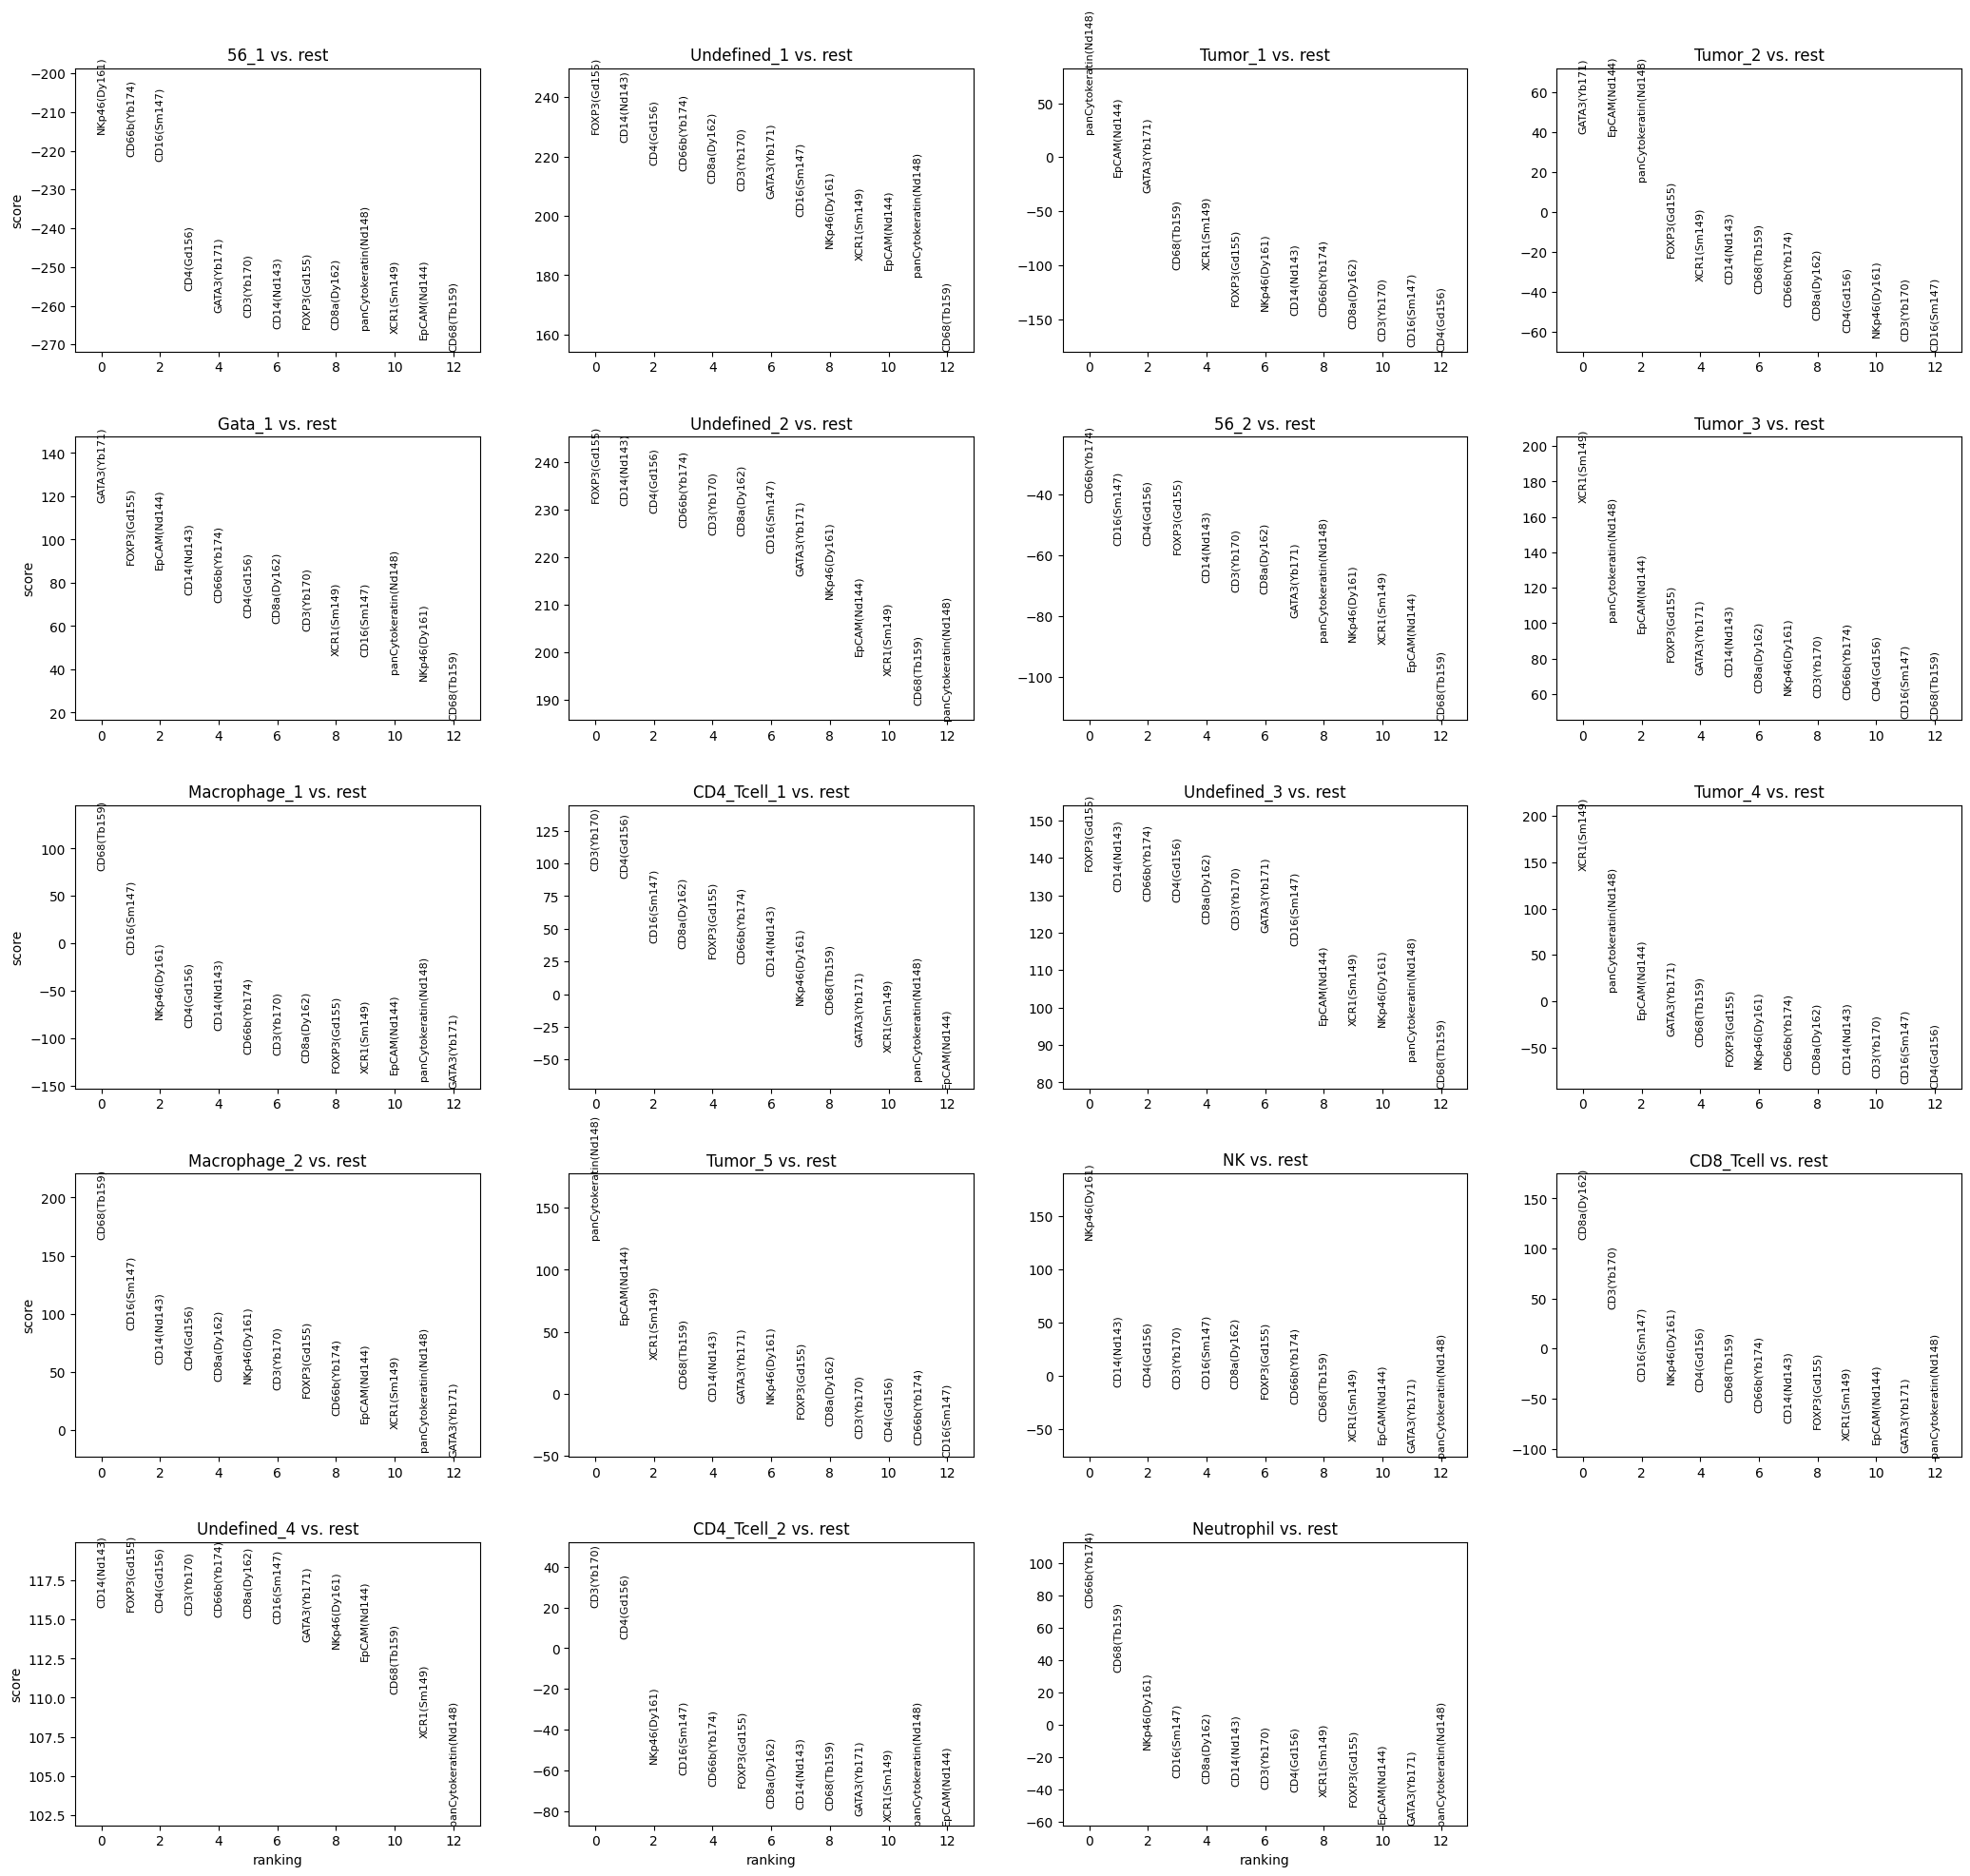

In [176]:
sc.tl.rank_genes_groups(adata_lineage, 'cluster_1', method='wilcoxon') 
sc.pl.rank_genes_groups(adata_lineage, n_genes=13, sharey=False)

/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


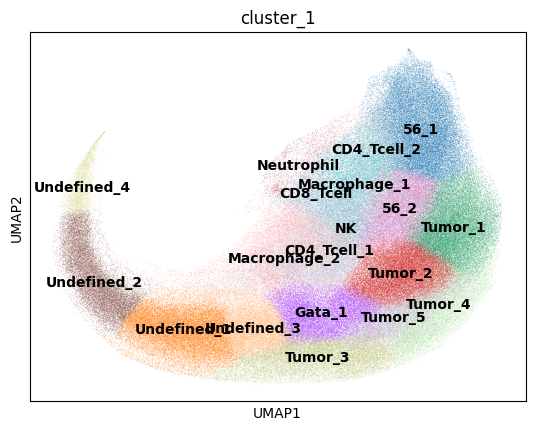

In [177]:
sc.pl.umap(adata, color=['cluster_1'],legend_loc='on data')

In [178]:



Immune = ['Macrophage_1', 'CD4_Tcell_1','Macrophage_2','NK',
          'CD8_Tcell','CD4_Tcell_2', 'Neutrophil']

Tumor = ['Tumor_1', 'Tumor_2', 
    'Gata_1', 'Tumor_3', 
    'Tumor_4',  'Tumor_5'] 

cluster_56 = ['56_1','56_2']

Undefined = ['Undefined_1', 'Undefined_2','Undefined_3','Undefined_4'] 

adata_Immune = adata [adata.obs['cluster_1'].isin(Immune)]
adata_Tumor = adata [adata.obs['cluster_1'].isin(Tumor)]
adata_cluster_56 = adata[adata.obs['cluster_1'].isin(cluster_56)]
adata_Undefined = adata[adata.obs['cluster_1'].isin(Undefined)] 

In [179]:
adata_Immune.obs['cluster_1_name'] = 'Immune'
adata_Tumor.obs['cluster_1_name'] = 'Tumor' 
adata_cluster_56.obs['cluster_1_name'] = 'cluster_56'
adata_Undefined.obs['cluster_1_name'] = 'Undefined' 

/scratch/37706509/ipykernel_2019902/2659292041.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_Immune.obs['cluster_1_name'] = 'Immune'
/scratch/37706509/ipykernel_2019902/2659292041.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_Tumor.obs['cluster_1_name'] = 'Tumor'
/scratch/37706509/ipykernel_2019902/2659292041.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_cluster_56.obs['cluster_1_name'] = 'cluster_56'
/scratch/37706509/ipykernel_2019902/2659292041.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_Undefined.obs['cluster_1_name'] = 'Undefined'


In [180]:
concat =ad.concat([adata_Immune, adata_Tumor, adata_cluster_56, adata_Undefined])


In [181]:
concat

AnnData object with n_obs × n_vars = 360673 × 33
    obs: 'sample', 'roi', 'obj_id', 'X_centroid', 'Y_centroid', 'area', 'perimeter', 'minor_axis_length', 'major_axis_length', 'eccentricity', 'solidity', 'n_protein_by_counts', 'total_counts', 'cell_count', 'mob_id', 'pre_post', 'mob', 'cell_id', 'leiden', 'cluster_1', 'cluster_1_name'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    layers: 'log', 'raw', 'z_scale'

In [3]:
sc.pl.umap(concat, color=['cluster_1'],legend_loc='on data')

NameError: name 'concat' is not defined

KeyError: 'Could not find key cluster_1_name in .var_names or .obs.columns.'

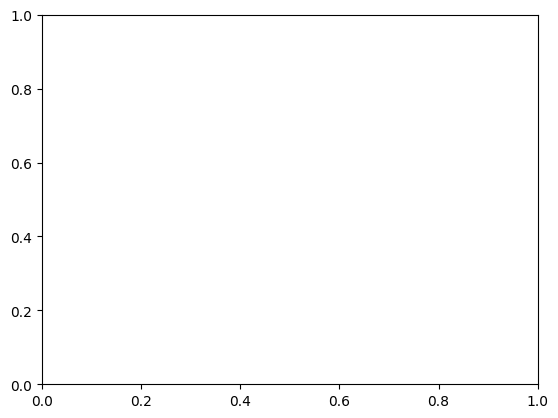

In [4]:
sc.pl.umap(adata, color=['cluster_1_name'],legend_loc='on data')

In [184]:
concat_firstcluster_names = pd.DataFrame(concat.obs[['cell_id','cluster_1_name']])


In [185]:
concat_firstcluster_names

,cell_id,cluster_1_name
230807_BCG01_Area3-01-0012,cell_9,Immune
230807_BCG01_Area3-01-0032,cell_29,Immune
230807_BCG01_Area3-01-0039,cell_36,Immune
230807_BCG01_Area3-01-0101,cell_98,Immune
230807_BCG01_Area3-01-0103,cell_100,Immune
...,...,...
BCG02_230627-02-1846,cell_359460,Undefined
BCG02_230627-02-1851,cell_359465,Undefined
BCG02_230627-02-1853,cell_359467,Undefined
BCG02_230627-02-1858,cell_359471,Undefined


In [186]:
concat_firstcluster_names.set_index('cell_id', inplace=True)
adata.obs = adata.obs.join(concat_firstcluster_names, on='cell_id')


In [187]:
adata.obs

,sample,roi,obj_id,X_centroid,Y_centroid,area,perimeter,minor_axis_length,major_axis_length,eccentricity,...,n_protein_by_counts,total_counts,cell_count,mob_id,pre_post,mob,cell_id,leiden,cluster_1,cluster_1_name
230807_BCG01_Area3-01-0003,230807_BCG01_Area3,230807_BCG01_Area3-01,3,7.798246,71.236842,114.0,39.142136,10.735118,13.723384,0.622965,...,33,165.579940,1534,1371_pre,pre,1371,cell_0,1,Undefined_1,Undefined
230807_BCG01_Area3-01-0004,230807_BCG01_Area3,230807_BCG01_Area3-01,4,8.207792,51.454545,77.0,31.313708,8.136043,12.088005,0.739581,...,33,61.537973,1534,1371_pre,pre,1371,cell_1,2,Tumor_1,Tumor
230807_BCG01_Area3-01-0005,230807_BCG01_Area3,230807_BCG01_Area3-01,5,9.715556,182.315556,225.0,57.112698,14.157603,20.908666,0.735876,...,33,90.438201,1534,1371_pre,pre,1371,cell_2,3,Tumor_2,Tumor
230807_BCG01_Area3-01-0006,230807_BCG01_Area3,230807_BCG01_Area3-01,6,11.088235,61.696078,102.0,37.384776,9.734949,13.614470,0.699079,...,33,197.760229,1534,1371_pre,pre,1371,cell_3,5,Undefined_2,Undefined
230807_BCG01_Area3-01-0007,230807_BCG01_Area3,230807_BCG01_Area3-01,7,13.978723,129.063830,47.0,23.071068,7.488948,8.022086,0.358470,...,33,96.438094,1534,1371_pre,pre,1371,cell_4,6,56_2,cluster_56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BCG02_230627-03-1214,BCG02_230627,BCG02_230627-03,1214,590.393939,426.257576,66.0,27.556349,8.102249,10.346567,0.621914,...,32,40.670804,1197,2138_pre,pre,2138,cell_360668,0,56_1,cluster_56
BCG02_230627-03-1215,BCG02_230627,BCG02_230627-03,1215,591.756410,491.487179,78.0,30.142136,9.598018,10.335545,0.370978,...,33,44.055914,1197,2138_pre,pre,2138,cell_360669,6,56_2,cluster_56
BCG02_230627-03-1217,BCG02_230627,BCG02_230627-03,1217,593.483333,515.283333,60.0,26.727922,7.589057,10.055711,0.656069,...,32,36.300239,1197,2138_pre,pre,2138,cell_360670,8,Macrophage_1,Immune
BCG02_230627-03-1218,BCG02_230627,BCG02_230627-03,1218,593.486486,552.540541,37.0,20.485281,5.884725,8.009470,0.678369,...,32,24.827786,1197,2138_pre,pre,2138,cell_360671,0,56_1,cluster_56


In [189]:
adata

AnnData object with n_obs × n_vars = 360673 × 33
    obs: 'sample', 'roi', 'obj_id', 'X_centroid', 'Y_centroid', 'area', 'perimeter', 'minor_axis_length', 'major_axis_length', 'eccentricity', 'solidity', 'n_protein_by_counts', 'total_counts', 'cell_count', 'mob_id', 'pre_post', 'mob', 'cell_id', 'leiden', 'cluster_1', 'cluster_1_name'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'markers', 'channel', 'total_signal', 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'moved_genes', 'neighbors', 'pca', 'rank_genes_groups', 'umap', 'cluster_1_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'log', 'raw', 'z_scale'
    obsp: 'connectivities', 'distances'

In [190]:
concat

AnnData object with n_obs × n_vars = 360673 × 33
    obs: 'sample', 'roi', 'obj_id', 'X_centroid', 'Y_centroid', 'area', 'perimeter', 'minor_axis_length', 'major_axis_length', 'eccentricity', 'solidity', 'n_protein_by_counts', 'total_counts', 'cell_count', 'mob_id', 'pre_post', 'mob', 'cell_id', 'leiden', 'cluster_1', 'cluster_1_name'
    uns: 'cluster_1_colors', 'cluster_1_name_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    layers: 'log', 'raw', 'z_scale'

adata_Immune = adata [adata.obs['cluster_1'].isin(Immune)]
adata_Tumor = adata [adata.obs['cluster_1'].isin(Tumor)]
adata_cluster_56 = adata[adata.obs['cluster_1'].isin(cluster_56)]
adata_Undefined = adata[adata.obs['cluster_1'].isin(Undefined)] 

/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_

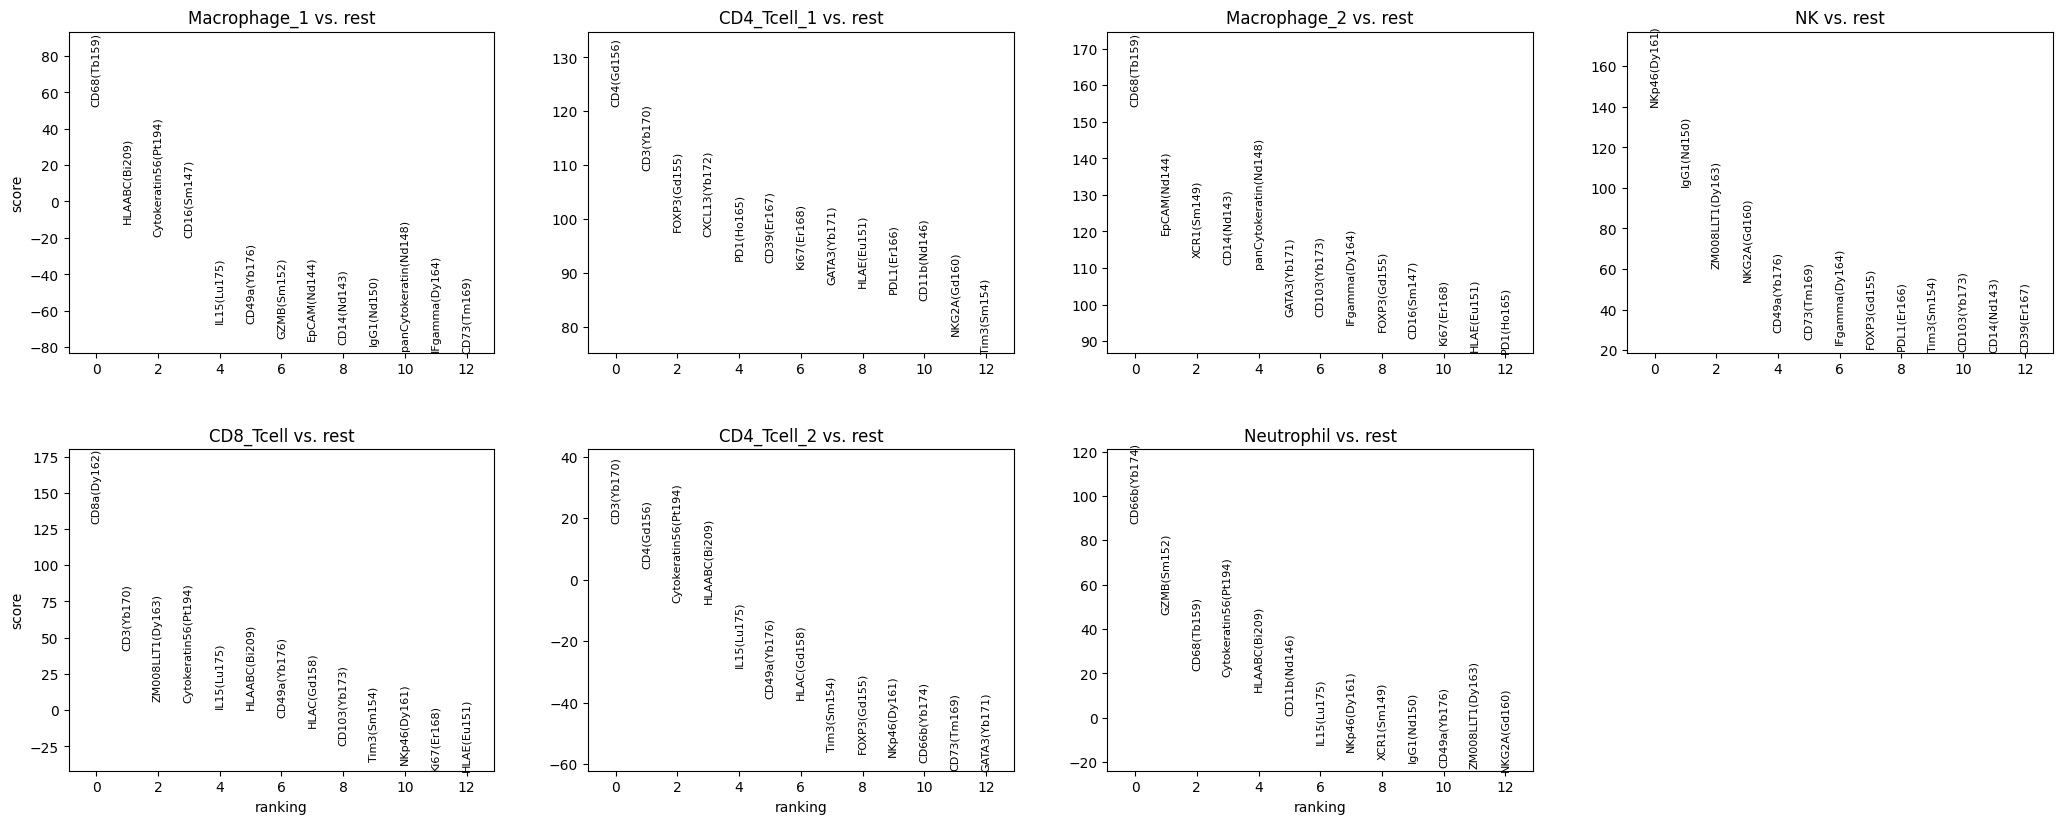

In [191]:
sc.tl.rank_genes_groups(adata_Immune, 'cluster_1', method='wilcoxon') 
sc.pl.rank_genes_groups(adata_Immune, n_genes=13, sharey=False)

/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_

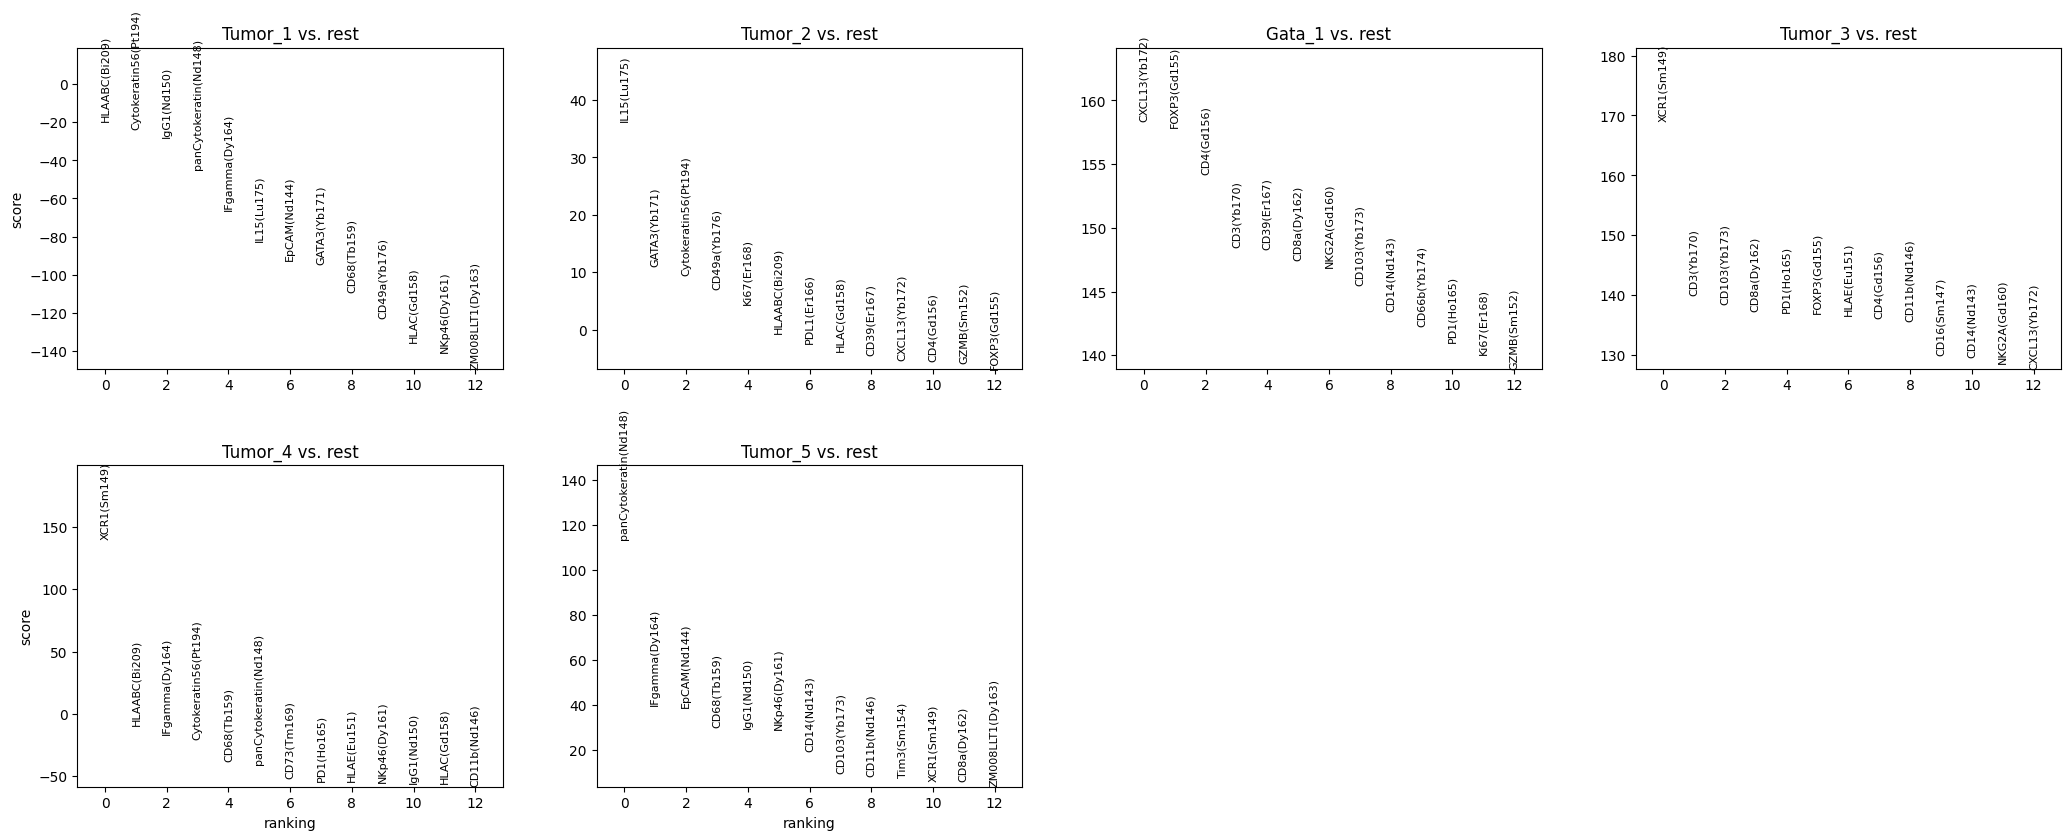

In [192]:
sc.tl.rank_genes_groups(adata_Tumor, 'cluster_1', method='wilcoxon') 
sc.pl.rank_genes_groups(adata_Tumor, n_genes=13, sharey=False)

/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


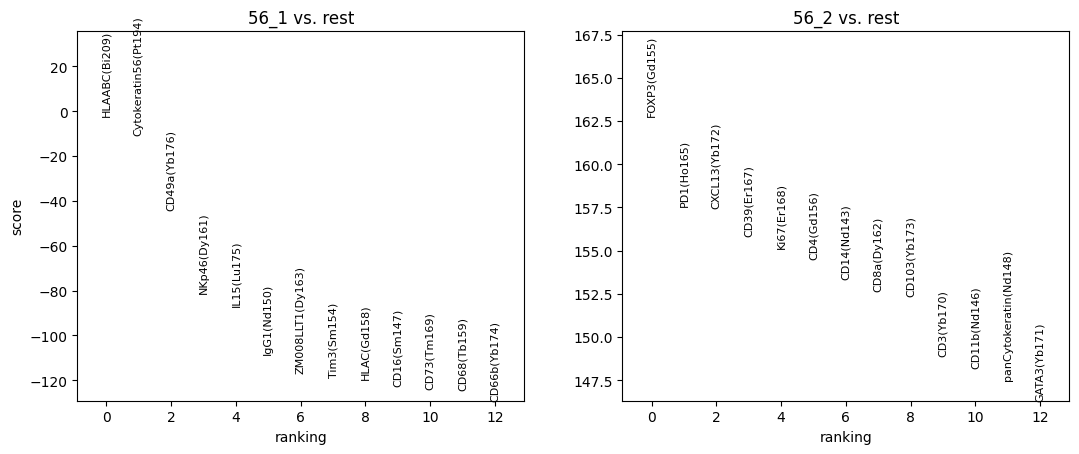

In [193]:
sc.tl.rank_genes_groups(adata_cluster_56, 'cluster_1', method='wilcoxon') 
sc.pl.rank_genes_groups(adata_cluster_56, n_genes=13, sharey=False)

/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/tessdiv/miniconda3/envs/imc/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


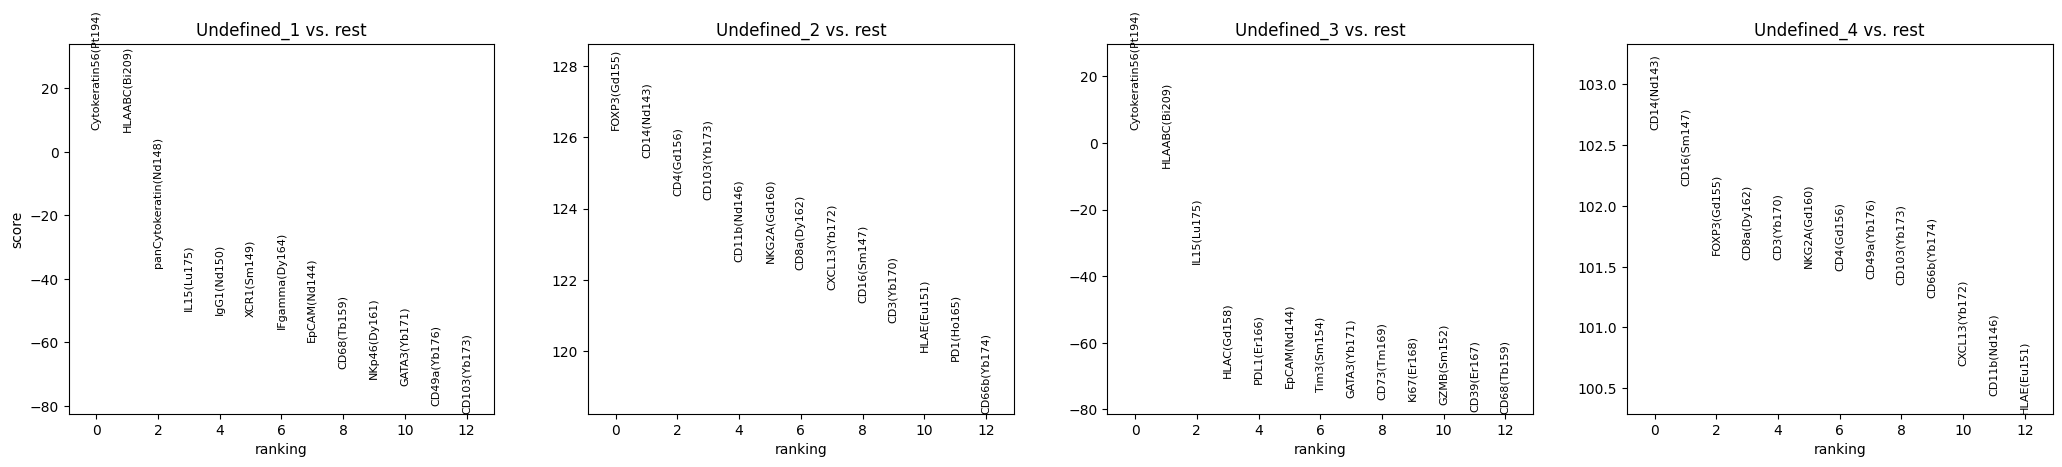

In [194]:
sc.tl.rank_genes_groups(adata_Undefined, 'cluster_1', method='wilcoxon') 
sc.pl.rank_genes_groups(adata_Undefined, n_genes=13, sharey=False)

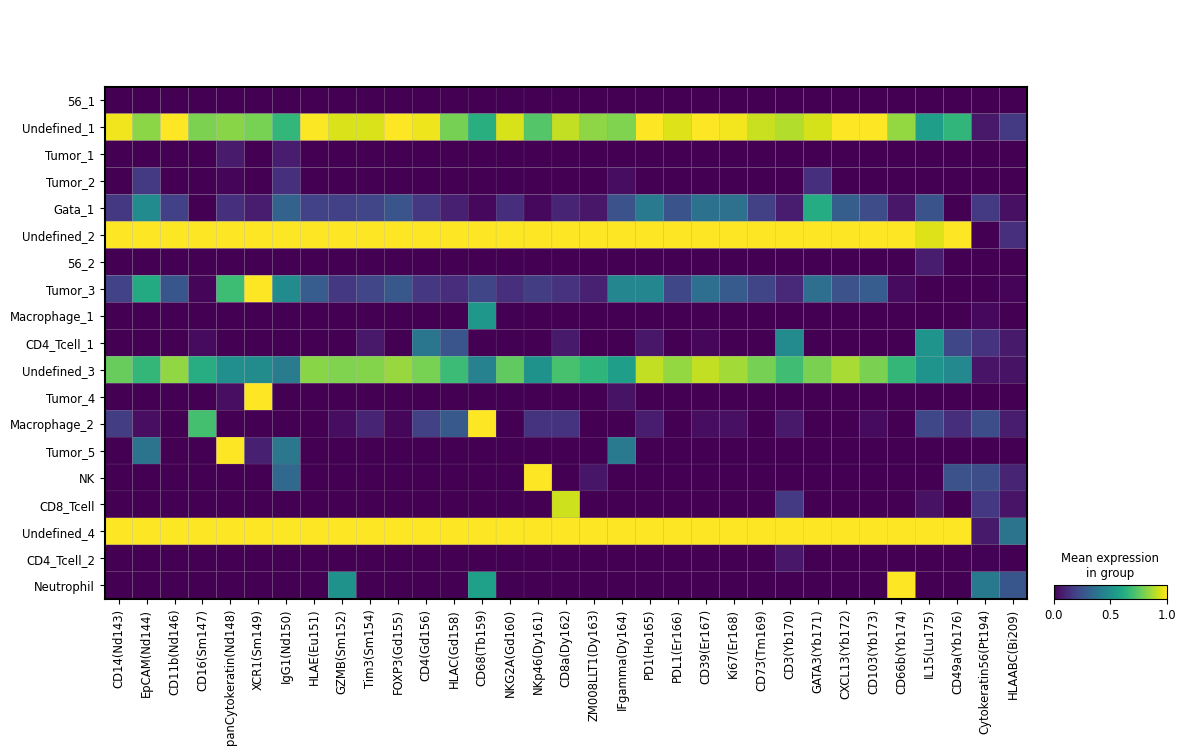

In [195]:
sc.pl.matrixplot(adata, adata.var_names, 'cluster_1',vmin =0, vmax=1)

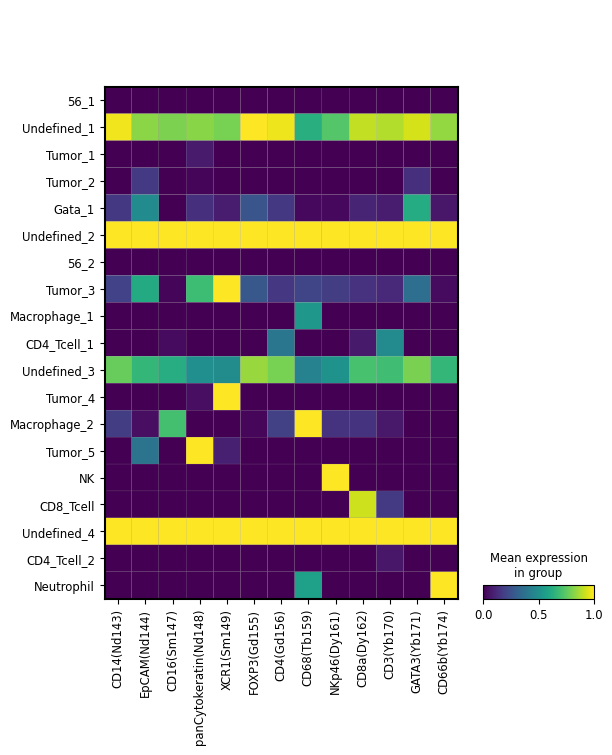

In [198]:
highly_variable_genes = adata.var_names[adata.var['highly_variable']]
sc.pl.matrixplot(adata, highly_variable_genes, 'cluster_1',vmin =0, vmax=1)

In [199]:
adata.obs.cluster_1.value_counts()


cluster_1
56_1            38704
Undefined_1     36242
Tumor_1         32173
Tumor_2         31467
Gata_1          23760
Undefined_2     23025
56_2            21273
Tumor_3         19756
Macrophage_1    17893
CD4_Tcell_1     17682
Undefined_3     17123
Tumor_4         17051
Macrophage_2    15763
Tumor_5         14447
NK              11395
CD8_Tcell       11335
Undefined_4      4771
CD4_Tcell_2      3787
Neutrophil       3026
Name: count, dtype: int64

In [200]:
adata.obs.cluster_1_name.value_counts()


cluster_1_name
Tumor         138654
Undefined      81161
Immune         80881
cluster_56     59977
Name: count, dtype: int64

In [201]:
adata.write('cluster_1.h5ad')


In [1]:
138654/360673

0.38443132699148536

In [2]:
80881/360673

0.22425022111441667